## Tutorial 2: Tensor Decompositions

### As found in [here.](https://www.tensors.net/p-tutorial-2)

This tutorial covers the basics of decomposing tensors into products of other tensors, including:

* Diagonal, unitary and isometric tensors.
* Use of singular value decomposition 'svd' to decompose tensors.
* Use of spectral decomposition 'eig' to decompose tensors.
* Use of QR decomposition 'qr'.
* The Frobenius norm and optimal restricted rank tensor truncations.

In [1]:
import numpy as np
from numpy import linalg as LA
from ncon import ncon

### Diagonal, unitary and isometric tensors

We begin by considering some special types of tensors and their diagrammatic representation:

<img src="img/tut_2_fig_1.png" alt="drawing" width="550"/>

which from left to right are the identity matrix, a diagonal matrix D and a diagonal tensor.

Unitary matrices annihilate to the identity with its conjugate $U^\dagger$ and we often use arrows to indicate unitarity. In the case of a tensor, it is unitary if there exists a bipartition of the indices (denoted by a dotted line) under which the tensor could be reshaped into a unitary matrix:

<img src="img/tut_2_fig_2_unitaries.png" alt="drawing" width="550"/>

Isometric matrices will have different dimensions in the indices, $d_1 > d_2$ w/o l.o.g. . When contracted on the larger dimensional index with its conjugate the identity is produced, $W^\dagger W = 1$. However, contraction on the other way, $W W^\dagger = P$ produces a projector P:

<img src="img/tut_2_fig_3_isometric_matrices.png" alt="drawing" width="550"/>

Something similar to the diagrammatic notation for unitaries happens for isometric tensors.

### Tensor decompositions

In this section we discuss how several common matrix decompositions, including the SVD, the spectral decomposition and the QR decomposition are generalized to the case of tensors.

#### Singular Value Decomposition (SVD)

Given a $d_1 \times d_2$ matrix A (where $d_1 > d_2$ has been assumed), we want to write it as a product of matrices, $A = U S V^\dagger$, where $U$ is a $d_1 \times d_2$ isometric matrix, $V$ is a $d_2 \times d_2$ unitary matrix and $S$ is a $d_2 \times d_2$ diagonal matrix with positive, real elements ordered in descending magnitude (called the singular values). The cost of performing the SVD is $O(d_1 d_2^2)$.

In the case of a tensor $A$ of $\text{rank} \geq 3$, the whole thing proceeds equally as before once we have reshaped $A$ appropriately. The only difference, though, is that $U$ will be an isometric tensor.

<img src="img/tut_2_svd.png" alt="drawing" width="550"/>

In [2]:
# Example code: SVD of a matrix
d1 = 10; d2 = 6

A = np.random.rand(d1,d2)

[U,S,Vh] = LA.svd(A,full_matrices=False) # If true we would have extra dimensions with zeros

# To check result we contract U,S,Vh and we should get A
Af = U @ np.diag(S) @ Vh

print(LA.norm(Af-A))

2.3505547907798496e-15


In [3]:
# Example code: SVD of a tensor
d = 10

A = np.random.rand(d,d,d)

Am = A.reshape(d**2, d)

# Now it proceeds as SVD of a matrix
Um,Sm,Vh = LA.svd(Am,full_matrices=False)

U = Um.reshape(d,d,d); S = np.diag(Sm)

# check result
Af = ncon([U,S,Vh],[[-1,-2,1],[1,2],[2,-3]])

print(LA.norm(Af-A))

1.2396592612591374e-14


##### Aside:

The SVD is also a useful way of generating random unitary and isometric tensors:

In [4]:
# Example of how SVD can generate random unitaries and isometries
d1 = 10; d2 = 6;

# d1-by-d1 random unitary matrix U
U,_,_ = LA.svd(np.random.rand(d1,d1))

# d1-by-d2 random isometric matrix W
A = np.random.rand(d1,d2);
W,_,_ = LA.svd(A, full_matrices=False)

### Spectral decomposition:

Also known as "diagonalizing a Hamiltonian", where we decompose a $d \times d$ Hermitian matrix $H$ into $H = U D U^\dagger$, where $U$ is unitary and $D$ is the diagonal matrix of eigenvalues of $H$. Its cost scales as $O(d^3)$.

In the case of a tensor, the same thing applies after using the appropriate 'reshape' commands. The differences though, are that the number of eigenvalues is now the product of the indices on each side of $H$, and the tensor $U$ is reshaped into a order $> 2$ isometry.

<img src="img/tut_2_spectral.png" alt="drawing" width="550"/>

In [5]:
# Example code of the spectral decomposition of a Hermitian matrix
d = 10
A = np.random.rand(d,d)
H = 0.5*(A + A.T) # This is a way of making it Hermitian

D, U = LA.eigh(H)

# Check result
Hf = U @ np.diag(D) @ U.T

print(LA.norm(Hf-H))

4.976362627855249e-15


In [6]:
# Example code of the spectral decomposition of a Hermitian tensor
d = 2
A = np.random.rand(d,d,d,d)
H = 0.5*(A + A.transpose(2,3,0,1)) # Now we transpose according to diagrammatic rep.

D, U = LA.eigh(H.reshape(d**2,d**2))
U = U.reshape(d,d,d**2)

# Check result
Hf = ncon([U,np.diag(D),U], [[-1,-2,1],[1,2],[-3,-4,2]])

print(LA.norm(Hf-H))

3.1502272644110215e-15


#### Aside:

For any matrix $A$, the spectral decompositions of $A A^\dagger$ and $A^\dagger A$ are related to the SVD of A as depicted in the following fig:

<img src="img/tut_2_svd_vs_spectral.png" alt="drawing" width="550"/>

### QR decomposition

This is the final decomposition that we consider, and is useful to orthogonalize a TN, as will be discussed later in tutorial 3.

Given a $d_1 \times d_2$ matrix $A$, we want to write it as $A = QR$, where $Q$ is a $d_1 \times d_2$ isometric matrix and $R$ is a $d_2 \times d_2$ upper-triangular matrix. The cost scales as $O(d_1 d_2^2)$, which is the same as the SVD, though QR tends to be faster in practice by a constant factor.

Again, through appropriate reshaping, this method can be applied to tensors as well.

<img src="img/tut_2_QR.png" alt="drawing" width="550"/>


In [7]:
# Example code of QR decomposition of a matrix
d1 = 10; d2 = 6
A = np.random.rand(d1,d2)

Q,R = LA.qr(A)

# Check result
Af = Q @ R

print(LA.norm(Af-A))

9.836601059614785e-16


In [8]:
# Example code of QR decomposition of a tensor
d = 10
A = np.random.rand(d,d,d)

Qm,R = LA.qr(A.reshape(d**2,d))
Q = Qm.reshape(d,d,d)

# Check result
Af = ncon([Q,R], [[-1,-2,1],[1,-3]])

print(LA.norm(Af-A))

4.2209713900338e-15


### Frobenius norm for tensors

Given a matrix $A$, the norm $||A||$ is defined as the square-root of the sum of the magnitude of each element squared,
$$||A|| = \sqrt{\sum_{ij} |A_{ij}|^2} = \sqrt{\text{tr} (A^\dagger A)}.$$
The extension to tensors with order $> 2$ is very straight-forward; either extend the summation to include all indices or replace the trace with a tensor trace Ttr. In Python, the Frobenius norm is already LA.norm(A).

A useful property of the Frobenius norm is that $\text{Ttr}(A^\dagger A)$ is the square root of the sum of the singular values squared:

$$\text{Ttr}(A^\dagger A) = \sum_k s_k^2.$$

The proof is obvious and very nice to see visually using tensor diagrams:

<img src="img/tut_2_frobenius_svd_proof.png" alt="drawing" width="550"/>

The usefulness of the Frobenius norm comes when approximating some tensor $A$ with another tensor $B$ of equal size. It's useful to define the error of the approximation $\varepsilon$ as

$$\varepsilon = \frac{||A - B||}{||A||}$$


### Restricted rank tensor approximations

We're given some tensor $A$ and some bipartition of its indices. If $A$ can be written as $A = B \cdot C$, we define the decomposition rank $r$ as the dimension of the index contracted between $B$ and $C$. Although this will not be proved here, it can be shown that the decomposition rank $r$ of tensor $A$ across a partition precisely equals the number of non-zero singular values in the SVD across the partition.

A useful application of the SVD thus is that it allows one to find the optimal restricted rank approximation to a tensor. Given a tensor $A$ that has decomposition rank $r$ with respect to some specified partition of its indices, let's assume that we wish to find an equivalent sized tensor $B$ of reduced rank, $\chi < r$, that best approximates $A$.

The factorization that minimizes the truncation error $\varepsilon$ can be obtained directly from the SVD of $A$ by simply 'trimming' the smallest singular values and truncating the $U$ and $V$ matrices accordingly. This is demonstrated below by approximating order-5 tensor $A$ with an order-5 tensor $B$ that has rank $\chi = 8$ across the partition indicated, using the truncated SVD:

<img src="img/D15.png" alt="drawing" width="650"/>

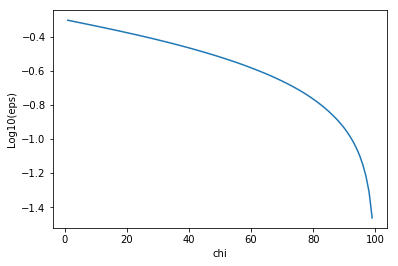

In [20]:
import time
d = 10
A = np.random.rand(d,d,d,d,d)

# SVD
Um, S, Vhm = LA.svd(A.reshape(d**3,d**2), full_matrices=False)
U = Um.reshape(d,d,d,d**2)
Vh = Vhm.reshape(d**2,d,d)

# Truncation
def trunc(chi):
    Vht = Vh[:chi,:,:]
    St = np.diag(S[:chi])
    Ut = U[:,:,:,:chi]

    B = ncon([Ut,St,Vht],[[-1,-2,-3,1],[1,2],[2,-4,-5]])
    
    return B

# Comparison
epsL = []
for chi in range(1,d**2):
    B = trunc(chi)
    epsAB = LA.norm(A-B)/LA.norm(A)
    epsL.append(epsAB)
#    print('chi:'+str(chi)+', eps:'+str(round(epsAB,4))+', t:'+str(round(tf-t0,4))+'s')

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(range(1,d**2), np.log(epsL)/np.log(10))
plt.xlabel('chi')
plt.ylabel('Log10(eps)')
plt.show()

A useful concept is the effective rank to accuracy $\Delta$ of a tensor, denoted as $r(\Delta)$ and defined as the number of singular values greater than or equal to $\Delta$ across the decomposition. In many cases (particularly if the spectrum of singular values is sharply decaying) then the error $\varepsilon$ in truncating a tensor to rank $r(\Delta)$ will be $\varepsilon \approx \Delta$, since $\varepsilon = \sqrt{\sum_{k > \chi} s_k^2}$ will be dominated by the largest singular value that is truncated. Thus the value $\Delta$ often serves as a useful proxy for the true truncation error $\varepsilon$.

In [29]:
# Example: effective rank
d = 500

# We will generate a Toeplitz matrix
A = np.diag(np.ones(d-1),-1) + np.diag(np.ones(d-1),1)
A /= LA.norm(A)

# Compute effective rank to accuracy 'deltaval'
deltaval = 1e-2
Um, Sm, Vhm = LA.svd(A)

r_delta = sum(Sm > deltaval) # This gives the number of elements in Sm larger than deltaval

eps_err = np.sqrt(sum(Sm[r_delta:]**2)) # Associated error to r_delta

print('delta:'+str(deltaval)+', r(delta):'+str(r_delta)+', eps:'+str(round(eps_err,4)))

delta:0.01, r(delta):450, eps:0.0404


### Outlook: Tensor Decompositions

Optimal restricted rank tensor approximations play a central role in TN theory and are also essential ingredients to most TN algorithms. In fact, most common TN algorithms are simply composed of some combination of contraction steps (see Tutorial 1), together with some combination of tensor decompositions. Thus we have already learned the foundational tools of TN methods!

Subsequent tutorials will discuss how these tools can be applied and composed into algorithms for certain tasks.

## Problem Set 2:

Tensor $A$ is an order-4 tensor that we define element-wise as:

<img src="img/D21.png" alt="drawing" width="500"/>

**(a)** Assume that indices i,j are of dimension $d_1$ and indices k, l are of dimension $d_2$ ($d_2 < d_1$ as usual). How does the cost of taking the SVD across the indicated partition scale with $d_1$ and $d_2$?

**(b)** Generate the tensor $A$ for $d_1=10$ and $d_2 = 8$. What is the norm $||A||$? After computing the norm construct the normalized tensor $A \to \frac{A}{||A||}$.

**(c)** Take the SVD of $A$ across the indicated partition. Check that the square root of the sum of the singular values squared is equal to 1. Why is this the case?

**(d)** What is the effective rank $r(\Delta)$ of $A$ at $\Delta = 1\text{e-4}$?

**(e)** Compute the truncation error $\varepsilon$ of the restricted rank approximation $r(\Delta = 1\text{e-4})$ indirectly using the singular values $\left(\varepsilon = \sqrt{\sum_{k > \chi} s_k^2} \right)$.

**(f)** Construct the optimal restricted rank approximation to A via the truncated SVD. Compute the truncation error $\varepsilon$ of this approximation and check that your answer is consistent with part (e).

---

### My Solutions:

**(a)** For a matrix with dimensions $d_1$ and $d_2$ ($d_2 < d_1$) the cost of SVD scales as $O(d_1 d_2^2)$. In our case, we can reshape $A$ into a matrix with dimensions $d_1^2$ and $d_2^2$. Therefore, the cost of the SVD of A will be $O(d_1^2 d_2^4)$.

**(b)**

In [31]:
# Generate A with d1=10 and d2=8
d1 = 10; d2 = 8

A = np.zeros((d1,d1,d2,d2))

for i in range(d1):
    for j in range(d1):
        for k in range(d2):
            for l in range(d2):
                A[i,j,k,l] = np.sqrt(i + 2*j + 3*k + 4*l + 10)

# Norm of A
print(LA.norm(A))

# Normalize A
A /= LA.norm(A)

554.2562584220408


**(c)**

In [35]:
# Take SVD
Um, S, Vhm = LA.svd(A.reshape(d1**2,d2**2), full_matrices=False)

U = Um.reshape(d1,d1,d2**2)
Vh = Vhm.reshape(d2**2,d2,d2)

# Check that singular values 'sum' to 1
s_sum = np.sqrt(sum(S**2))

print(s_sum)

# They sum to 1 because ||A||=1

1.0000000000000002


**(d)** and **(e)**

In [42]:
# Effective rank r_delta at deltaval = 1e-4
deltaval = 1e-4

r_delta = sum(S > deltaval) # This gives the number of elements in S larger than deltaval

eps_err = np.sqrt(sum(S[r_delta:]**2)) # Associated error to r_delta

print('delta:'+str(deltaval)+', r(delta):'+str(r_delta)+', eps:'+str(round(eps_err,8)))

delta:0.0001, r(delta):3, eps:1.048e-05


**(f)** Optimal restricted rank approximation to $A$ means taking $\chi = r(\Delta)$

In [43]:
# Truncation
def trunc(chi):
    Vht = Vh[:chi,:,:]
    St = np.diag(S[:chi])
    Ut = U[:,:,:chi]

    B = ncon([Ut,St,Vht],[[-1,-2,1],[1,2],[2,-4,-5]])
    
    return B

# Comparison
chi = r_delta
B = trunc(chi)
epsAB = LA.norm(A-B)
print(round(epsAB,8))

1.048e-05


We see that errors in **(e)** and **(f)** are identical up to numerical accuracy!